#### Loading the libraries

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

#### Load the data into a pandas DataFrame

In [3]:
df = pd.read_csv(r"C:\Users\PC User\Desktop\Me\DATA ANALYSIS\PROJECTS\TO DO\Supply Chain.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


#### Get a summary of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

#### Checking for missing values

In [6]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

#### Checking for duplicate values

In [10]:
df.loc[df.duplicated()]

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs


#### Finding the correlations among numerical columns

In [151]:
numerical_df = df.select_dtypes(include = ['int64', 'float64'])
numerical_df.corr()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Total_cost,Total_costs
Price,1.000000,0.019083,0.005739,0.038424,0.078261,0.044855,0.095819,0.071942,0.058543,0.152185,-0.124575,-0.301313,-0.184123,-0.147247,0.088501,-0.177928,0.068081
Availability,0.019083,1.000000,0.087496,-0.075170,-0.025900,0.170439,0.143769,-0.051377,-0.044179,-0.156669,0.050134,0.065333,0.134652,0.040626,-0.027315,0.129997,-0.012593
Number of products sold,0.005739,0.087496,1.000000,-0.001641,0.022189,-0.046419,0.015992,0.087315,0.044285,0.041230,0.187945,-0.048939,0.034284,-0.082726,-0.036951,0.038155,-0.032477
Revenue generated,0.038424,-0.075170,-0.001641,1.000000,-0.158480,-0.057296,0.029422,-0.109211,-0.072892,-0.014178,-0.037441,0.014073,-0.214025,-0.125335,0.027252,-0.219656,0.002476
Stock levels,0.078261,-0.025900,0.022189,-0.158480,1.000000,0.072571,-0.111455,-0.094883,0.072907,0.067880,0.043763,-0.050592,0.033243,-0.149478,-0.012088,0.039726,-0.007569
Lead times,0.044855,0.170439,-0.046419,-0.057296,0.072571,1.000000,0.105459,-0.045156,-0.120746,-0.002818,-0.145324,0.003364,-0.024441,0.015681,0.243686,-0.035320,0.238438
Order quantities,0.095819,0.143769,0.015992,0.029422,-0.111455,0.105459,1.000000,-0.002561,0.004261,-0.086189,-0.086567,0.112347,-0.026784,0.018986,0.167306,-0.026270,0.163476
Shipping times,0.071942,-0.051377,0.087315,-0.109211,-0.094883,-0.045156,-0.002561,1.000000,0.045108,-0.022214,-0.060470,-0.016953,0.029132,-0.036673,-0.045541,0.033102,-0.041588
Shipping costs,0.058543,-0.044179,0.044285,-0.072892,0.072907,-0.120746,0.004261,0.045108,1.000000,0.029680,-0.097979,-0.005653,0.005984,0.083139,0.051671,0.097006,0.062276
Lead time,0.152185,-0.156669,0.041230,-0.014178,0.067880,-0.002818,-0.086189,-0.022214,0.029680,1.000000,0.212676,0.026756,-0.121999,0.297099,0.045219,-0.118724,0.031666


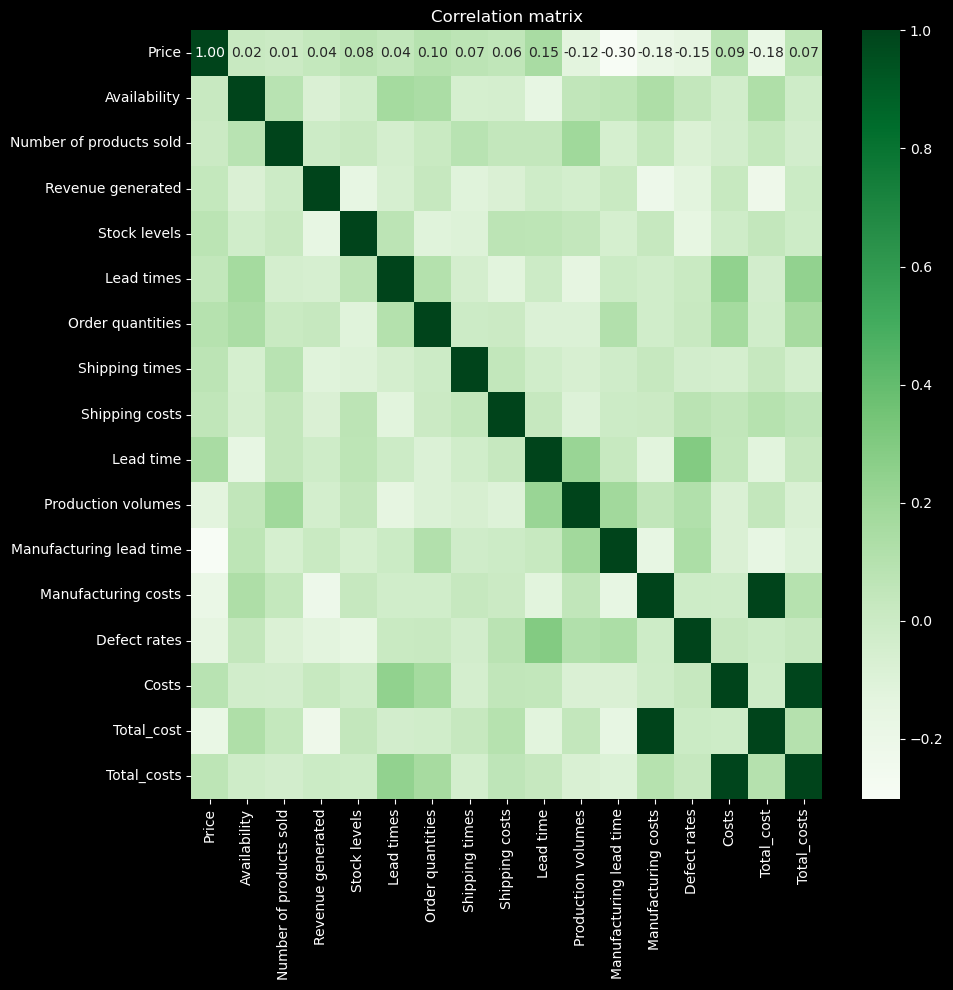

In [201]:
corr_matrix = numerical_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot =True, cmap ='Greens', fmt ='.2f', annot_kws={"size": 10})
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

### Identify Best Selling Products

In [15]:
best_selling = df.nlargest(5, 'Number of products sold')
print(best_selling[['Product type', 'SKU', 'Number of products sold','Revenue generated']])

   Product type    SKU  Number of products sold  Revenue generated
10     skincare  SKU10                      996        2330.965802
94    cosmetics  SKU94                      987        7888.356547
9      skincare   SKU9                      980        4971.145988
36     skincare  SKU36                      963        7573.402458
37     skincare  SKU37                      963        2438.339930


### Best Selling Products by Product type

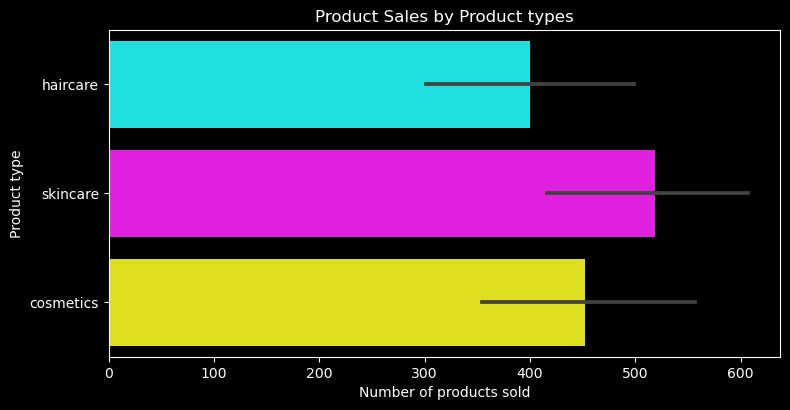

In [292]:
plt.figure(figsize = (8,4))
colors = ['cyan', 'magenta', 'yellow', 'green', 'darkorange']
sns.barplot(data = df, x = 'Number of products sold', y = 'Product type',palette = colors)
plt.tight_layout()
plt.title('Product Sales by Product types')
plt.show()

### Impact of Price on Sales



C:\Users\PC User\AppData\Local\Temp\ipykernel_12228\1714813783.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data = df, x = 'Price', y = 'Number of products sold', hue = 'Product type', palette = colors )


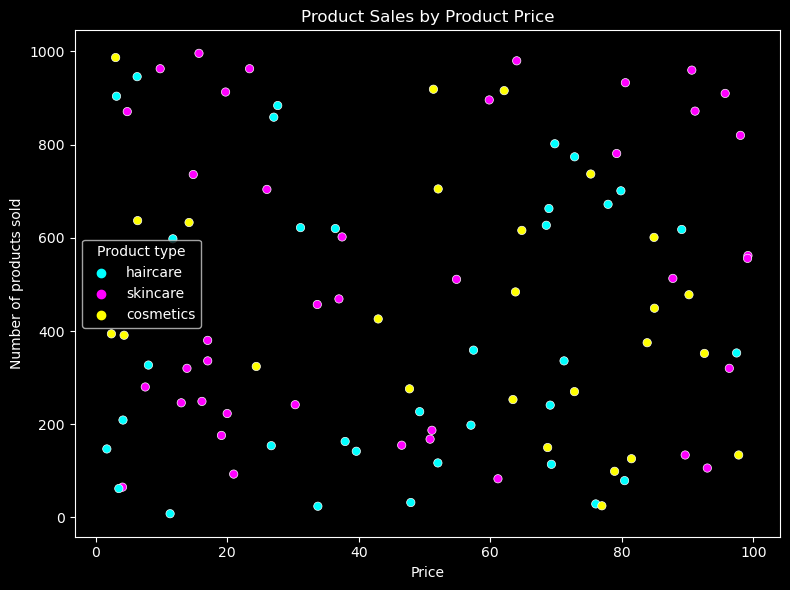

In [293]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = 'Price', y = 'Number of products sold', hue = 'Product type', palette = colors )
plt.title('Product Sales by Product Price')
plt.tight_layout()
plt.show()

### Analyze Supplier Performance

Supplier name
Supplier 1    1.803630
Supplier 4    2.337397
Supplier 2    2.362750
Supplier 3    2.465786
Supplier 5    2.665408
Name: Defect rates, dtype: float64


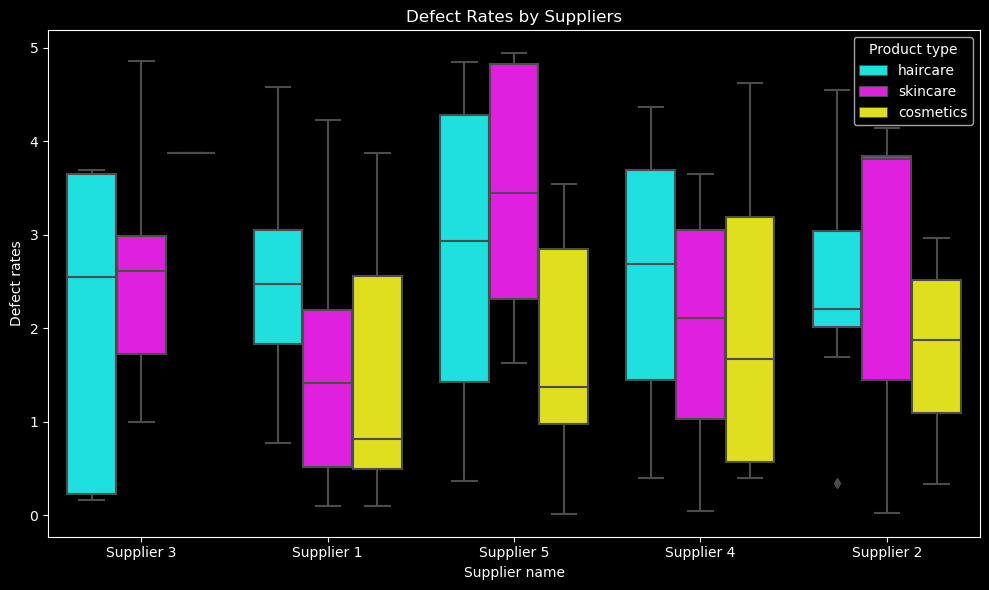

In [294]:
supplier_performance = df.groupby(['Supplier name']) ['Defect rates'].mean().sort_values(ascending=True)
print(supplier_performance)

plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Supplier name', y = 'Defect rates', hue = 'Product type', palette)
plt.title('Defect Rates by Suppliers')
plt.tight_layout()
plt.show()

### Cost Analysis



Product type
cosmetics    1276.934916
haircare     1848.435511
skincare     2156.113805
Name: Total_cost, dtype: float64


<Figure size 1200x600 with 0 Axes>

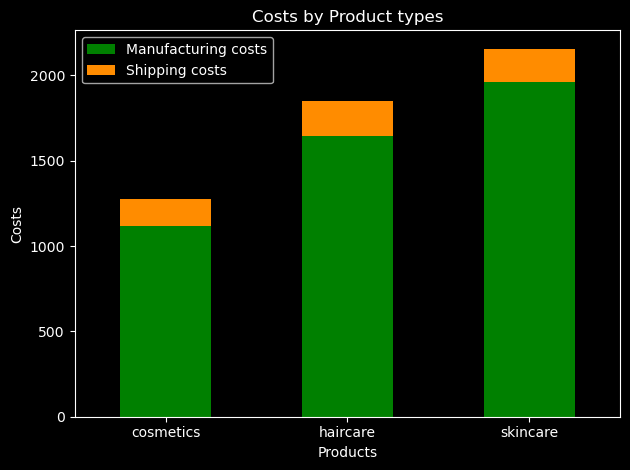

In [295]:
df['Total_cost'] = df['Shipping costs'] + df['Manufacturing costs']
Cost_analysis = df.groupby('Product type')['Total_cost'].sum()
print(Cost_analysis)

plt.figure(figsize = (12,6))
stacked = df.pivot_table(index='Product type', values = ['Shipping costs', 'Manufacturing costs'], aggfunc='sum')
stacked.plot( kind = 'bar',stacked = True, color = [ 'green', 'darkorange'])
plt.title('Costs by Product types')
plt.xlabel('Products')
plt.ylabel('Costs')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Supplier Lead Times Comparison



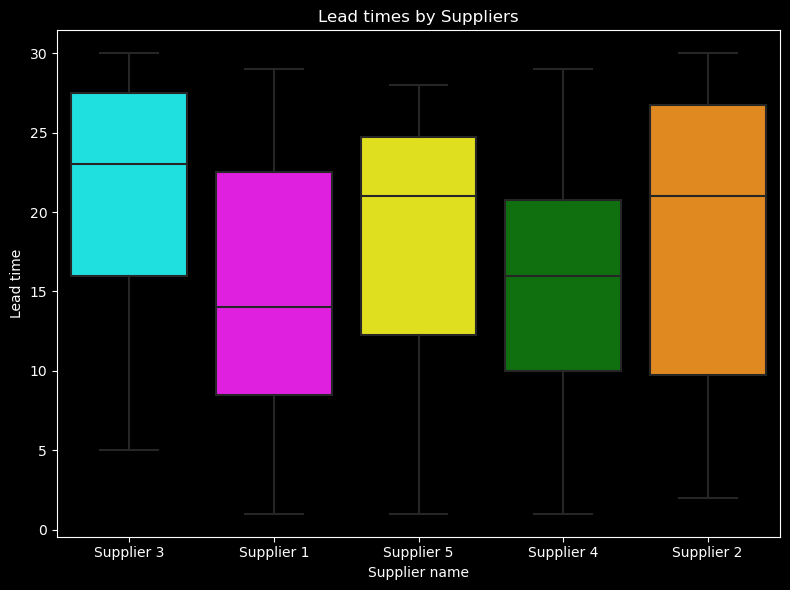

In [296]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df , x = 'Supplier name', y = 'Lead time', palette = (colors))
plt.title('Lead times by Suppliers')
plt.tight_layout()
plt.show()

### Lead time with Customer location



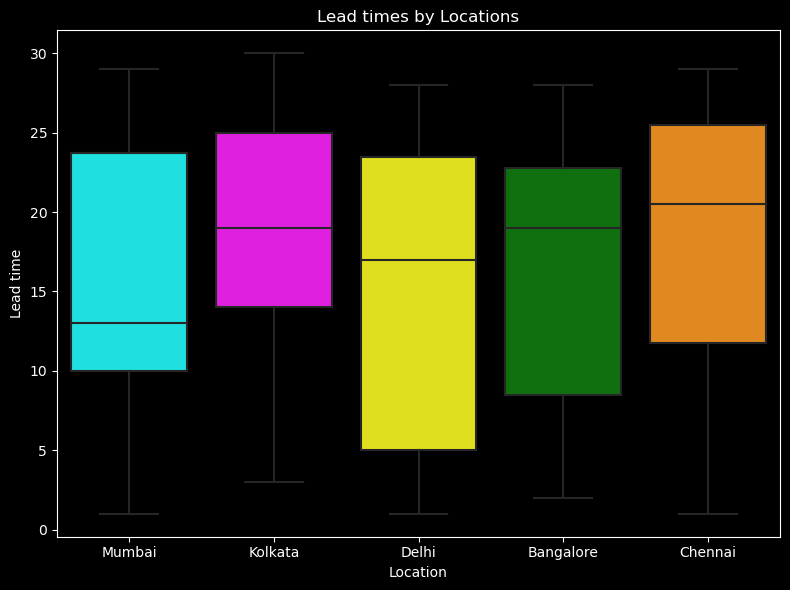

In [297]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Location', y = 'Lead time', palette = colors)
plt.title('Lead times by Locations')
plt.tight_layout()
plt.show()

### Product Sales by Location

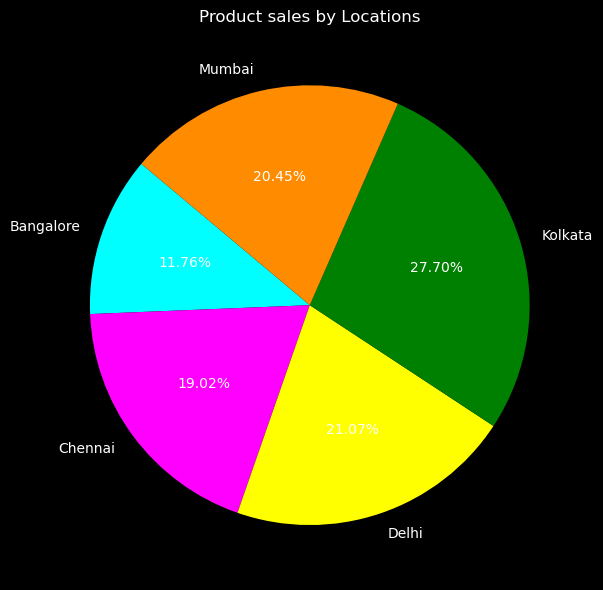

In [301]:
grouped_df = df.groupby('Location')['Number of products sold'].sum()

plt.figure(figsize = (10,6))
plt.pie(grouped_df, labels= grouped_df.index, autopct = '%1.2f%%', startangle = 140, colors = colors)
plt.title('Product sales by Location')
plt.tight_layout()
plt.show()

### Identifying areas with highest costs



              Manufacturing costs  Shipping costs         Costs   Total_costs
Product type                                                                 
cosmetics             1119.371253      157.563663  13366.397283  14643.332199
haircare              1647.571776      200.863735  17328.862865  19177.298376
skincare              1959.726295      196.387510  22229.318068  24385.431873


<Figure size 1200x600 with 0 Axes>

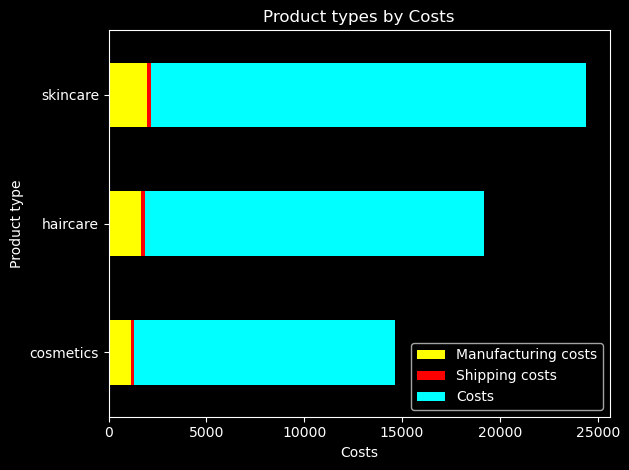

In [334]:
df['Total costs'] = df['Manufacturing costs'] + df['Shipping costs'] + df['Costs']
Total_cost_sum = df.groupby('Product type')[['Manufacturing costs', 'Shipping costs', 'Costs', 'Total_costs']].sum()
print(Total_cost_sum)

plt.figure(figsize = (12,6))
Cost_breakdown = df.groupby('Product type')[['Manufacturing costs', 'Shipping costs', 'Costs']].sum()
Cost_breakdown.plot(kind = 'barh', stacked = True, color = ['yellow', 'red', 'cyan'])
plt.title('Product types by Costs')
plt.xlabel('Costs')
plt.tight_layout()
plt.show()

### Transportation Modes by Costs



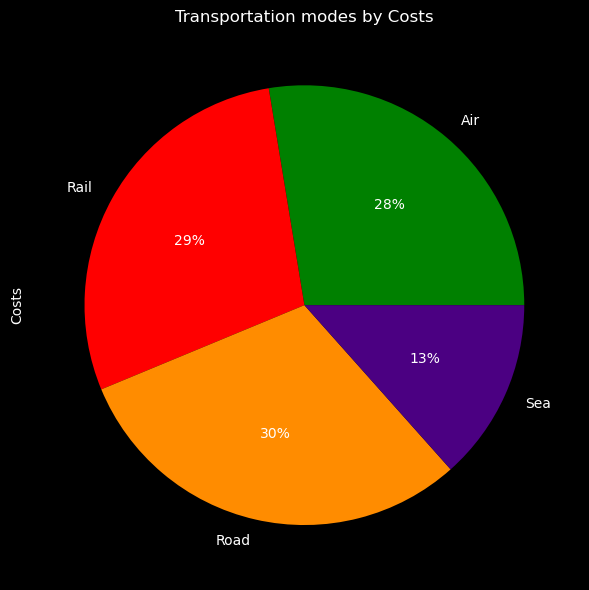

In [338]:
Transport_costs = df.groupby(['Transportation modes'])['Costs'].sum()
plt.figure(figsize = (10,6))
Transport_costs.plot(kind = 'pie', autopct = '%1.f%%', colors = ['green', 'red', 'darkorange', 'indigo'])
plt.title('Transportation modes by Costs')
plt.tight_layout()
plt.show()

### Transportation Modes by Costs & Product types

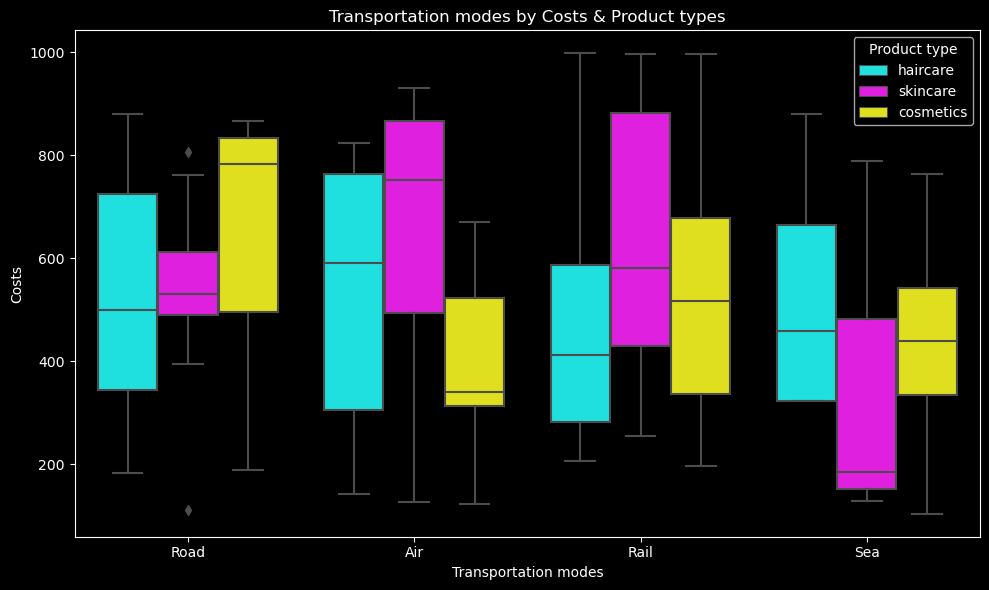

In [340]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Transportation modes', y = 'Costs', hue = 'Product type', data = df, palette = colors)
plt.title('Transportation modes by Costs & Product types')
plt.tight_layout()
plt.show()

### Product availability


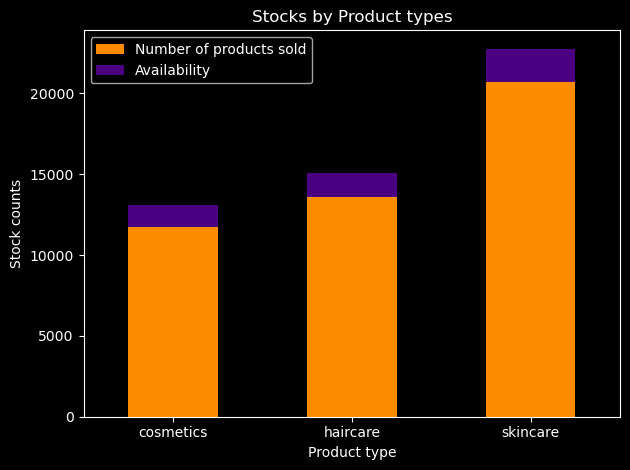

In [350]:
Total_products = df.groupby('Product type')[['Number of products sold','Availability']].sum()

Total_products.plot(kind = 'bar', stacked = True, color =['darkorange', 'indigo'])
plt.title('Stocks by Product types')
plt.ylabel('Stock counts')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# THANK YOU!
